In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


file1 = './Resources/city_data.csv'
city_df = pd.read_csv(file1)
city_df.head()



,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [2]:
file2 = './Resources/ride_data.csv'
ride_df = pd.read_csv(file2)
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [3]:
city_grpbycity=city_df.groupby(["city","type"],as_index=False)
city_citysum_df=city_grpbycity.sum()
city_citysum_df.head()

,city,type,driver_count
0,Alvarezhaven,Urban,21
1,Alyssaberg,Urban,67
2,Anitamouth,Suburban,16
3,Antoniomouth,Urban,21
4,Aprilchester,Urban,49


In [4]:
ride_grpbycity=ride_df.groupby(["city"],as_index=False)
ride_citycnt_df=ride_grpbycity.count()
ride_citycnt_df.drop(['date', 'fare'],axis=1,inplace=True)
ride_citycnt_df.rename(columns={"ride_id":"total_rides"},inplace=True)
ride_citycnt_df.head()

,city,total_rides
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [5]:
ride_citysum_df=ride_grpbycity.sum()
ride_citysum_df.drop(['ride_id'],axis=1,inplace=True)
ride_citysum_df.rename(columns={"fare":"total_fare"},inplace=True)
ride_citysum_df.head()

,city,total_fare
0,Alvarezhaven,741.79
1,Alyssaberg,535.85
2,Anitamouth,335.84
3,Antoniomouth,519.75
4,Aprilchester,417.65


In [6]:
ride_cityavg_df=ride_grpbycity.mean()
ride_cityavg_df.drop(['ride_id'],axis=1,inplace=True)
ride_cityavg_df.rename(columns={"fare":"avg_city_fare"},inplace=True)
ride_cityavg_df.head()

,city,avg_city_fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


In [7]:
ride_citymrg1_df=pd.merge(ride_citycnt_df, ride_citysum_df, on="city")
ride_citymrg_df=pd.merge(ride_citymrg1_df, ride_cityavg_df, on="city")
ride_citymrg_df.head()

,city,total_rides,total_fare,avg_city_fare
0,Alvarezhaven,31,741.79,23.928710
1,Alyssaberg,26,535.85,20.609615
2,Anitamouth,9,335.84,37.315556
3,Antoniomouth,22,519.75,23.625000
4,Aprilchester,19,417.65,21.981579


In [8]:
main_mrg_df=pd.merge(city_citysum_df, ride_citymrg_df, on="city")
main_mrg_df.head()




,city,type,driver_count,total_rides,total_fare,avg_city_fare
0,Alvarezhaven,Urban,21,31,741.79,23.928710
1,Alyssaberg,Urban,67,26,535.85,20.609615
2,Anitamouth,Suburban,16,9,335.84,37.315556
3,Antoniomouth,Urban,21,22,519.75,23.625000
4,Aprilchester,Urban,49,19,417.65,21.981579


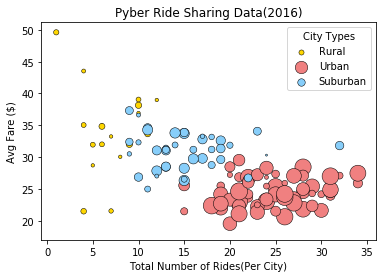

In [9]:
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Avg Fare ($)")
plt.figsize=(6,5)

p_rural=plt.scatter(            
            main_mrg_df["total_rides"].loc[main_mrg_df["type"]=="Rural"],
            main_mrg_df["avg_city_fare"].loc[main_mrg_df["type"]=="Rural"],            
            s=main_mrg_df["driver_count"].loc[main_mrg_df["type"]=="Rural"]*4,
            c="gold",label="Rural",alpha=1,linewidths=.5,edgecolor="black")

p_urban=plt.scatter(
            main_mrg_df["total_rides"].loc[main_mrg_df["type"]=="Urban"],
            main_mrg_df["avg_city_fare"].loc[main_mrg_df["type"]=="Urban"],
            s=main_mrg_df["driver_count"].loc[main_mrg_df["type"]=="Urban"]*4,
            c="lightcoral",label="Urban",alpha=1,linewidths=.5,edgecolor="black")

p_subrbn=plt.scatter(     
            main_mrg_df["total_rides"].loc[main_mrg_df["type"]=="Suburban"],
            main_mrg_df["avg_city_fare"].loc[main_mrg_df["type"]=="Suburban"],
            s=main_mrg_df["driver_count"].loc[main_mrg_df["type"]=="Suburban"]*4,
            c="lightskyblue",label="Suburban",alpha=1,linewidths=.5,edgecolor="black")
plt.legend((p_rural,p_urban,p_subrbn),
           ("Rural","Urban","Suburban"),title="City Types")

##############################################
## Bubble - Solution 1A Using Scatter Plot  ##
##############################################

plt.show()

In [10]:
import seaborn as sns
import matplotlib.patches as mpatches
sns.set_style("ticks")


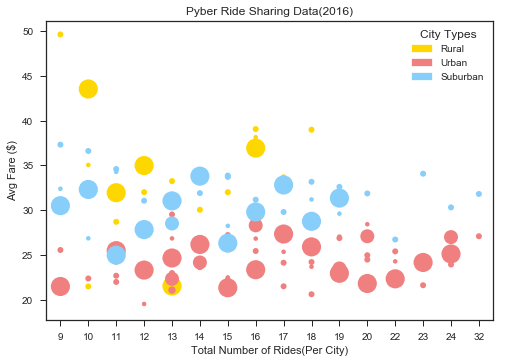

In [11]:
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Avg Fare ($)")

p_rural=sns.stripplot(x="total_rides", 
              y="avg_city_fare",
              data=main_mrg_df.loc[main_mrg_df["type"]=="Rural"],
              size=main_mrg_df["driver_count"]/3.5,
              linewidths=1,edgecolor="black",color="gold")

p_urban=sns.stripplot(x="total_rides", 
              y="avg_city_fare",
              data=main_mrg_df.loc[main_mrg_df["type"]=="Urban"],
              size=main_mrg_df["driver_count"]/3.5,
              linewidths=1,edgecolor="black",color="lightcoral")

p_subrbn=sns.stripplot(x="total_rides", 
              y="avg_city_fare",
              data=main_mrg_df.loc[main_mrg_df["type"]=="Suburban"],
              size=main_mrg_df["driver_count"]/3.5,
              linewidths=1,edgecolor="black",color="lightskyblue")


leg_rural = mpatches.Patch(color='gold', label='Rural')
plt.legend(handles=[leg_rural],title="City Type")

leg_urban = mpatches.Patch(color='lightcoral', label='Urban')
plt.legend(handles=[leg_urban],title="City Type")


leg_sub = mpatches.Patch(color='lightskyblue', label='Suburban')
plt.legend(handles=[leg_sub],title="City Type")

plt.legend((leg_rural,leg_urban,leg_sub),
           ("Rural","Urban","Suburban"),title="City Types")

p_rural.set(xlabel='Total Number of Rides(Per City)', ylabel='Avg Fare ($)')
p_urban.set(xlabel='Total Number of Rides(Per City)', ylabel='Avg Fare ($)')
p_subrbn.set(xlabel='Total Number of Rides(Per City)', ylabel='Avg Fare ($)')


##############################################
## Bubble - Solution 1B Using Seaborn Lib   ##
##############################################

sns.plt.show()

In [12]:
main_grpbytype_df=main_mrg_df.groupby(["type"],as_index=False)
main_typesum_df=main_grpbytype_df.sum()
main_typesum_df.rename(columns={"driver_count":"total_drivers"},inplace=True)
main_typesum_df.head()

,type,total_drivers,total_rides,total_fare,avg_city_fare
0,Rural,104,125,4255.09,615.728572
1,Suburban,638,625,19317.88,1268.627391
2,Urban,2607,1625,40078.34,1623.863390


In [13]:
main_typesum_df["pct_fare"]=(main_typesum_df["total_fare"]/main_typesum_df.sum()["total_fare"])*100
main_typesum_df["pct_rides"]=(main_typesum_df["total_rides"]/main_typesum_df.sum()["total_rides"])*100
main_typesum_df["pct_drivers"]=(main_typesum_df["total_drivers"]/main_typesum_df.sum()["total_drivers"])*100
main_typesum_df            

,type,total_drivers,total_rides,total_fare,avg_city_fare,pct_fare,pct_rides,pct_drivers
0,Rural,104,125,4255.09,615.728572,6.68500,5.263158,3.105405
1,Suburban,638,625,19317.88,1268.627391,30.34954,26.315789,19.050463
2,Urban,2607,1625,40078.34,1623.863390,62.96546,68.421053,77.844133


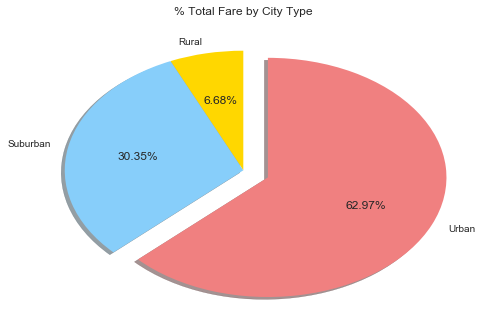

In [14]:
plt.title("% Total Fare by City Type")
plt.pie(main_typesum_df["pct_fare"],labels=main_typesum_df["type"],colors=("gold","lightskyblue","lightcoral"),startangle=90,explode=(0, 0, 0.15),shadow=True,autopct='%1.2f%%')


plt.show()



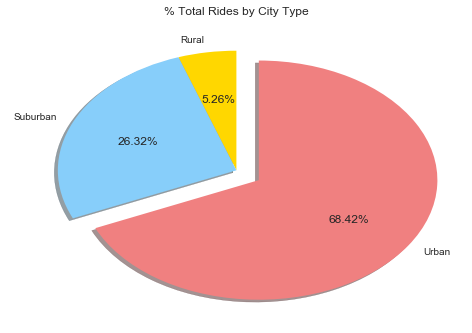

In [15]:
plt.title("% Total Rides by City Type")
plt.pie(main_typesum_df["pct_rides"],labels=main_typesum_df["type"],colors=("gold","lightskyblue","lightcoral"),startangle=90,explode=(0, 0, 0.15),shadow=True,autopct='%1.2f%%')
plt.show()

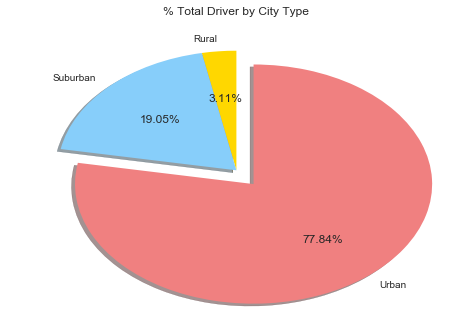

In [16]:
plt.title("% Total Driver by City Type")
plt.pie(main_typesum_df["pct_drivers"],labels=main_typesum_df["type"],colors=("gold","lightskyblue","lightcoral"),startangle=90,explode=(0, 0, 0.15),shadow=True,autopct='%1.2f%%')
plt.show()